# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [4]:
#def P1(num_examples=5):
### STUDENT START ###

for i in range(1,6):
    print('\nprint', i, train_data[i],'\nlabel:', train_labels[i])

    
### STUDENT END ###
#P1()


print 1 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries. 
label: 3

print 2 
 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.com (Mark Brader) 

MB>                                                             So the
MB> 1970 figure seems unlikely to actually be anything but a perijove.

JG>Sorry, _perijoves_...I'm not used to talking this language.

Couldn't we just say periapsis or apoapsis?

  
label: 2

print 3 I have a request for those who would like to see Charley Wingate
respond to the "Charley Challenges" (and judging from my e-mail, there
appear to be quite a few of you.)  

It is clear that Mr. Wingate intends to continue to post tangential or
unrelated articles while ingoring the Challen

### Part 2:

Transform the training data into a matrix of word unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of word unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of character bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of word unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of word unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. 

In [59]:
#def P2():
### STUDENT START ###
vectorizer = CountVectorizer()
term_doc_training = vectorizer.fit_transform(train_data)
print('\n--PART A--Vocabulary size:')
print(term_doc_training.shape)
print('\nVocabulary size of the training  vocabulary', term_doc_training.shape[1])

non_zero = term_doc_training.getnnz()
# print('Non-zero features of training data',non_zero)

features = vectorizer.get_feature_names()
print('\n--PART B--0th and nth features:')
print('\n0th feature of training data',features[0])
print('\nnth feature of training data',features[26878])


print('\n--PART C--Own Vocabulary:')
my_train_data = ['atheism atheism atheism', 'graphics', 'space space', 'religion space', 'atheism religion space', 'graphics space religion', 'graphic religion', 'space religion', 'graphics 1 atheism', 'religion space', 'religion space atheism', 'religion space atheim graphics', 'test']
myVectorizer = CountVectorizer(vocabulary={'atheism', 'graphics', 'space', 'religion'})
small_term_doc_training = myVectorizer.fit_transform(my_train_data)
print(small_term_doc_training.toarray())
print('\nN-gram Feature Names', myVectorizer.get_feature_names())
print('\nNon Zero Features:', small_term_doc_training.getnnz())

print('\n--PART D--Bigram and Trigram:')
vectorizer_ngram = CountVectorizer(ngram_range=(2,3), analyzer = 'char')

vectorizer_ngram.fit_transform(my_train_data)
print('\nVocabulary', vectorizer_ngram.vocabulary_)
print('\nFeature Names', vectorizer_ngram.get_feature_names())
print('\nVocabulary size', len(vectorizer_ngram.vocabulary_))


print('\n--PART E--After pruning words:')
vectorizer_ngram_diff = CountVectorizer(ngram_range=(2,3), analyzer = 'word', min_df = 10)
vectorizer_ngram_diff.fit_transform(train_data)
print('\nVocabulary size with min diff: ', 10, ' = ', len(vectorizer_ngram_diff.vocabulary_))

print('\n--PART F--Fraction of words:')
#vectorizer_devdata = CountVectorizer()
term_doc_dev = vectorizer.transform(dev_data)
print('\nVocabulary size of dev data:', term_doc_dev.shape[1])
print(term_doc_dev.shape[1])
print('\nDifference in vocabulary size of test and dev data = ',term_doc_training.shape[1] - term_doc_dev.shape[1])
print('\nFraction of words missing in dev = ', (term_doc_training.shape[1] - term_doc_dev.shape[1])/term_doc_training.shape[1])

### STUDENT END ###
#P2()


--PART A--Vocabulary size:
(2034, 26879)

Vocabulary size of the training  vocabulary 26879

--PART B--0th and nth features:

0th feature of training data 00

nth feature of training data zyxel

--PART C--Own Vocabulary:
[[3 0 0 0]
 [0 1 0 0]
 [0 0 0 2]
 [0 0 1 1]
 [1 0 1 1]
 [0 1 1 1]
 [0 0 1 0]
 [0 0 1 1]
 [1 1 0 0]
 [0 0 1 1]
 [1 0 1 1]
 [0 1 1 1]
 [0 0 0 0]]

N-gram Feature Names ['atheism', 'graphics', 'religion', 'space']

Non Zero Features: 24

--PART D--Bigram and Trigram:

Vocabulary {'at': 16, 'th': 82, 'he': 39, 'ei': 28, 'is': 52, 'sm': 75, 'm ': 56, ' a': 2, 'ath': 17, 'the': 83, 'hei': 40, 'eis': 30, 'ism': 53, 'sm ': 76, 'm a': 57, ' at': 3, 'gr': 37, 'ra': 68, 'ap': 14, 'ph': 66, 'hi': 41, 'ic': 43, 'cs': 22, 'gra': 38, 'rap': 69, 'aph': 15, 'phi': 67, 'hic': 42, 'ics': 45, 'sp': 77, 'pa': 64, 'ac': 12, 'ce': 20, 'e ': 24, ' s': 8, 'spa': 78, 'pac': 65, 'ace': 13, 'ce ': 21, 'e s': 27, ' sp': 9, 're': 70, 'el': 31, 'li': 54, 'ig': 46, 'gi': 35, 'io': 50, 'on': 62, 'n '

### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [60]:
#def P3():
### STUDENT START ###

    
# class Performance:
#     pass #allows dynamically create properties

# f1_score(y_true, y_pred, labels=None, pos_label=1, average='weighted')
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
alphas = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
c = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100]


def P2(k_values):
    for k in k_values:
        KNNClassifyScore(k, term_doc_training, train_labels, term_doc_dev,  dev_labels)

    print('\n')
    for alpha in alphas:
        Multinomial(alpha)

    print('\n')    
    for item in c:
        L2Regression(item, term_doc_training, train_labels, term_doc_dev, dev_labels)
        
        
def KNNClassifyScore(n_neighbors, term_doc_training, train_labels,  term_doc_dev, dev_labels):
    neigh = KNeighborsClassifier(n_neighbors)
    neigh.fit(term_doc_training, train_labels)
    predicted_values = neigh.predict(term_doc_dev)
    f1 = metrics.f1_score(dev_labels, predicted_values, average="weighted")
    print('KNN - For k = ', n_neighbors, ', f1 Score = ', float("{0:.3f}".format(f1)))

modelList = []

def Multinomial(p_alpha):
    multinomial = MultinomialNB(alpha = p_alpha, class_prior=None, fit_prior=True)
    multinomial.fit(term_doc_training, train_labels)
    predicted = multinomial.predict(term_doc_dev)
    multinomial_f1 = metrics.f1_score(dev_labels, predicted, average="weighted" )
    multinomial_score = multinomial.score(term_doc_dev, dev_labels, sample_weight = None)
    print('Multinomial - For Alpha = ', p_alpha,', f1 Score =', float("{0:.3f}".format(multinomial_f1) ))
    


def L2Regression(p_c, term_doc_training, train_labels, term_doc_dev, dev_labels):
    clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=p_c, max_iter = 1000, random_state=0, solver='liblinear', multi_class='auto').fit(term_doc_training, train_labels)
    predicted = clf.predict(term_doc_dev)
    clf.predict_proba(term_doc_dev) 
    #print('Regression Score for Regularization Factor C =',p_c, clf.score(term_doc_dev, dev_labels), 'Weight factor', clf.coef_.shape)
     
    ssq0 = sum(map(lambda i : i * i, clf.coef_[0]))
    ssq1 = sum(map(lambda i : i * i, clf.coef_[1]))
    ssq2 = sum(map(lambda i : i * i, clf.coef_[2]))
    ssq3 = sum(map(lambda i : i * i, clf.coef_[3]))
    ssq0 = float("{0:.3f}".format(ssq0))
    ssq1 = float("{0:.3f}".format(ssq1))
    ssq2 = float("{0:.3f}".format(ssq2))
    ssq3 = float("{0:.3f}".format(ssq3))
    f1 =  metrics.f1_score(dev_labels, predicted, average="weighted" )
    f1 = float("{0:.3f}".format(f1))
    print('L2 Regression score for C = ',p_c,', f1 Score =', f1)
    print('Sum of squares: ssq0 = ', ssq0,', ssq1 = ', ssq1,', ssq2 = ', ssq2, ', ssq3 = ', ssq3)
    print('\n')
    
    
    
P2(k_values)



### STUDENT END ###
#P3()

KNN - For k =  1 , f1 Score =  0.381
KNN - For k =  3 , f1 Score =  0.408
KNN - For k =  5 , f1 Score =  0.429
KNN - For k =  7 , f1 Score =  0.45
KNN - For k =  9 , f1 Score =  0.437
KNN - For k =  11 , f1 Score =  0.427
KNN - For k =  13 , f1 Score =  0.424
KNN - For k =  15 , f1 Score =  0.433


Multinomial - For Alpha =  1e-10 , f1 Score = 0.747
Multinomial - For Alpha =  0.0001 , f1 Score = 0.763
Multinomial - For Alpha =  0.001 , f1 Score = 0.77
Multinomial - For Alpha =  0.01 , f1 Score = 0.775
Multinomial - For Alpha =  0.1 , f1 Score = 0.79
Multinomial - For Alpha =  0.5 , f1 Score = 0.786
Multinomial - For Alpha =  1.0 , f1 Score = 0.778
Multinomial - For Alpha =  2.0 , f1 Score = 0.769
Multinomial - For Alpha =  10.0 , f1 Score = 0.667




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


L2 Regression score for C =  1e-10 , f1 Score = 0.206
Sum of squares: ssq0 =  0.0 , ssq1 =  0.0 , ssq2 =  0.0 , ssq3 =  0.0


L2 Regression score for C =  0.0001 , f1 Score = 0.542
Sum of squares: ssq0 =  0.008 , ssq1 =  0.012 , ssq2 =  0.009 , ssq3 =  0.009


L2 Regression score for C =  0.001 , f1 Score = 0.619
Sum of squares: ssq0 =  0.165 , ssq1 =  0.201 , ssq2 =  0.181 , ssq3 =  0.187


L2 Regression score for C =  0.01 , f1 Score = 0.665
Sum of squares: ssq0 =  2.541 , ssq1 =  2.94 , ssq2 =  2.862 , ssq3 =  2.25


L2 Regression score for C =  0.1 , f1 Score = 0.697
Sum of squares: ssq0 =  27.133 , ssq1 =  24.659 , ssq2 =  27.458 , ssq3 =  23.021


L2 Regression score for C =  0.5 , f1 Score = 0.708
Sum of squares: ssq0 =  102.602 , ssq1 =  83.12 , ssq2 =  99.014 , ssq3 =  88.984


L2 Regression score for C =  1.0 , f1 Score = 0.694
Sum of squares: ssq0 =  166.964 , ssq1 =  130.89 , ssq2 =  157.883 , ssq3 =  145.711


L2 Regression score for C =  2.0 , f1 Score = 0.694
Sum of squa

ANSWER:

Why doesn't k-Nearest Neighbors work well for this problem? 

Answer: For topic modeling, KNN will have a huge number of features, leading to the curse of dimensionality and requiring exponentially large size of training data, which we do not have for this particular problem. 

Why doesn't Logistic Regression work as well as Naive Bayes does? Naive Bayes works better than Logistic in this case because Naive Bayes, unlike Logistic, is suitable even when training data size is less compared to the size of features. 

What is the relationship between logistic regression's sum of squared weights vs. C value? As the C value increases, the sum of squared weights increases at a faster rate.

### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [61]:
# Question: how do I reverse engineer labels associated with coeff_ values?

#def P4():
### STUDENT START ###
vectorizer_ngram_diff = CountVectorizer(ngram_range=(2,2), analyzer = 'word', min_df = 10)
term_doc_train_ngram = vectorizer_ngram_diff.fit_transform(train_data)
term_doc_dev_ngram = vectorizer_ngram_diff.transform(dev_data)
clf1 = LogisticRegression(C=0.5, solver='liblinear', multi_class='auto').fit(term_doc_train_ngram, train_labels)
clf1.predict(term_doc_dev_ngram)
clf1.predict_proba(term_doc_dev_ngram)
print(np.sort(clf1.coef_[0])[::-1][:5]) #display the top 5 weight values
print(np.sort(clf1.coef_[1])[::-1][:5])
print(np.sort(clf1.coef_[2])[::-1][:5])
print(np.sort(clf1.coef_[3])[::-1][:5])

MaxWtFeatureIndices = [list() for f in range(1)]

for i in range(0,4):
    MaxWtFeatureIndices.append(clf1.coef_[i].argsort()[::-1][:5])
        
    
print('\nWeight Matrix Indices', MaxWtFeatureIndices)

index = 0
featureIndices = [0] * 20
for row in range(len(MaxWtFeatureIndices)):
    for col in range(len(MaxWtFeatureIndices[row])):
        featureIndices[index] = MaxWtFeatureIndices[row][col] 
        index = index + 1

        
print('\n20 * 4 Table of Weights\n')
for i in featureIndices:
       print(features[i],'\t\t\t\t\t\t', float("{0:.3f}".format(clf1.coef_[0][i])), float("{0:.3f}".format(clf1.coef_[1][i])), float("{0:.3f}".format(clf1.coef_[2][i])), float("{0:.3f}".format(clf1.coef_[3][i])))
        
### STUDENT END ###
#P4()

[0.97050764 0.92582333 0.90344448 0.88820471 0.8465003 ]
[1.2461713  1.18854649 1.12483426 1.03017093 1.02749918]
[1.54491654 1.36297272 1.29097662 1.09550572 0.93664693]
[1.16607128 0.87070997 0.81808346 0.81263845 0.79131151]

Weight Matrix Indices [[], array([2043,  502, 1458, 2603,  498], dtype=int64), array([1241,  521, 1587, 1076,  936], dtype=int64), array([2194, 2114, 1742, 2187, 1840], dtype=int64), array([2045, 1586, 1420, 2096, 2847], dtype=int64)]

20 * 4 Table of Weights

963 						 0.971 -0.269 -0.3 -0.436
1902 						 0.926 -0.264 -0.478 -0.303
5_______ 						 0.903 -0.214 -0.371 -0.457
acsu 						 0.888 -0.235 -0.077 -0.539
18th 						 0.847 -1.057 -1.041 0.773
444 						 -0.776 1.246 -0.609 -0.719
1931 						 -0.454 1.189 -0.603 -0.467
68000 						 -0.412 1.125 -0.83 -0.271
3582 						 -0.292 1.03 -0.718 -0.288
2e3 						 -0.667 1.027 -0.495 -0.534
_for 						 -0.569 -0.992 1.545 -0.532
__________________________________________________________________________ 						 -0

ANSWER: The surprising aspect is that most features are basically numbers!

### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [63]:


#P5()


def empty_preprocessor(s):
    return s


def better_preprocessor(s):
    s = re.sub('[0-9]+', '#', s .lower()) #Replace numbers with a symbol
    s  = re.sub('[(+*).!@#$%^&<>_-]','#', s) #Replace special characters with a symbol
    return s          

### STUDENT START ###


#L2 Regression with an empty preprocessor

vectorizer_emptyProcess = CountVectorizer(preprocessor = empty_preprocessor)
term_doc_training_empty = vectorizer_emptyProcess.fit_transform(train_data)
term_doc_dev_empty = vectorizer_emptyProcess.transform(dev_data)

clf = LogisticRegression(penalty='l2', tol=0.015, C=0.5, max_iter = 1000, solver='liblinear', multi_class='auto').fit(term_doc_training_empty, train_labels)
predicted = clf.predict(term_doc_dev_empty )
clf.predict_proba(term_doc_dev_empty ) 
f1_empty = metrics.f1_score(dev_labels, predicted, average="weighted" )
print('Empty Processor - L2 Regression score for C = 0.5 is ', f1_empty)



#L2 Regression with a better preprocessor

vectorizer_clean = CountVectorizer(preprocessor = better_preprocessor)
term_doc_training_clean = vectorizer_clean.fit_transform(train_data)
term_doc_dev_clean = vectorizer_clean.transform(dev_data)

clf = LogisticRegression(penalty='l2', tol=0.015, C=0.5, max_iter = 1000, solver='liblinear', multi_class='auto').fit(term_doc_training_clean, train_labels)
predicted = clf.predict(term_doc_dev_clean )
clf.predict_proba(term_doc_dev_clean ) 
f1_better = metrics.f1_score(dev_labels, predicted, average="weighted" )
print('Better Processor - L2 Regression score for C = 0.5 is ', f1_better)
print('Difference in f1 scores between empty and better preprocessors is: ', f1_better - f1_empty)   
             

### STUDENT END ###

#def P5():
### STUDENT START ###

### STUDENT END ###
#P5()
     

Empty Processor - L2 Regression score for C = 0.5 is  0.6885201966619396
Better Processor - L2 Regression score for C = 0.5 is  0.6988317018864286
Difference in f1 scores between empty and better preprocessors is:  0.010311505224488982


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four topics.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

In [5]:

# C = [0.1, 0.2, ..]
# cv = CountVec..()
# x_train = cv.fit_tra..(train_data)
# for  c in C:
#    lr_l1 = LogRegr..(x_train, C=c, penalty=l1)
#    lr_l1.fit(x_train)
#    lr_l1.get_coef_
#    vocab = construct vocab of none zero coef
#    vec2 = CountVec..(vocabulary=vocab)
#    new_x= vec2.transform(train_data)
#    lr_l2 = LogReg(new_x, c=0.5, penalty=l2)
#   evaluate and record size of new_x and f1_score (edited) 

import pandas as pd
#def P6():
    # Keep this random seed here to make comparison easier.
np.random.seed(0)
c = [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100,200, 500, 1000]
  
    ### STUDENT START ###
#The below function runs L1 regression; L2 regression is already available above
def L1Regression(p_c, term_doc_training, train_labels, term_doc_dev, dev_labels):
    clf = LogisticRegression(penalty='l1', dual=False, tol=0.015, C=p_c, max_iter = 1000, random_state=0, solver='liblinear').fit(term_doc_training, train_labels)
    predicted = clf.predict(term_doc_dev)
    clf.predict_proba(term_doc_dev) 
    f1 =  metrics.f1_score(dev_labels, predicted, average="weighted" )
    df = pd.DataFrame(clf.coef_)  #Get a dataframe with all coefficients
    df_zero = df.loc[:, (df == 0).all()] #Get a dataframe with all zero columns
    df_nonzero = df.loc[:, (df != 0).any()] #Get a dataframe with all non-zero columns
    vocabulary_reduced = vectorizer_logistic.get_feature_names() #Get feature names 
    vocabulary_reduced = [vocabulary_reduced[i] for i in df_nonzero.columns.values] #Get reduced vocabulary using non-zero weighted features
    
    if (len(vocabulary_reduced) > 0):
        CountVectorizer_reduced = CountVectorizer(vocabulary = vocabulary_reduced)
        term_doc_training_reduced = CountVectorizer_reduced.fit_transform(train_data)
        term_doc_dev_reduced = CountVectorizer_reduced.transform(dev_data)
        print('Term Document Matrix Shape:', term_doc_training_reduced.shape)
        clf_reduced = LogisticRegression(penalty='l2', dual=False, tol=0.015, C=0.5, max_iter = 1000, random_state=0, solver='liblinear').fit(term_doc_training_reduced, train_labels)
        predicted_reduced = clf_reduced.predict(term_doc_dev_reduced)
        clf_reduced.predict_proba(term_doc_dev_reduced) 
        f1 =  metrics.f1_score(dev_labels, predicted_reduced, average="weighted" )
        print('L2 Regression f1 score with reduced vocabulary size of ', len(vocabulary_reduced) ,' for C = ', p_c, 'is ', float("{0:.3f}".format(f1)))
        f1scores.append(float("{0:.3f}".format(f1)))
        reduced_vocab.append(len(vocabulary_reduced))
        

    
vectorizer_logistic = CountVectorizer()
term_doc_training_logistic = vectorizer_logistic.fit_transform(train_data)
term_doc_dev_logistic = vectorizer_logistic.transform(dev_data)
f1scores = []  
reduced_vocab = []  

for item in c:
    L1Regression(item, term_doc_training_logistic, train_labels, term_doc_dev_logistic, dev_labels)
     
print('f1Scores:', f1scores)
print('Reduced Vocab size:', reduced_vocab)

#P6()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Term Document Matrix Shape: (2034, 3)
L2 Regression f1 score with reduced vocabulary size of  3  for C =  0.001 is  0.334
Term Document Matrix Shape: (2034, 16)
L2 Regression f1 score with reduced vocabulary size of  16  for C =  0.01 is  0.462
Term Document Matrix Shape: (2034, 207)
L2 Regression f1 score with reduced vocabulary size of  207  for C =  0.1 is  0.695
Term Document Matrix Shape: (2034, 746)
L2 Regression f1 score with reduced vocabulary size of  746  for C =  0.5 is  0.667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Term Document Matrix Shape: (2034, 1474)
L2 Regression f1 score with reduced vocabulary size of  1474  for C =  1.0 is  0.684
Term Document Matrix Shape: (2034, 1701)
L2 Regression f1 score with reduced vocabulary size of  1701  for C =  2.0 is  0.682
Term Document Matrix Shape: (2034, 3306)
L2 Regression f1 score with reduced vocabulary size of  3306  for C =  10.0 is  0.691
Term Document Matrix Shape: (2034, 7695)
L2 Regression f1 score with reduced vocabulary size of  7695  for C =  100 is  0.688
Term Document Matrix Shape: (2034, 16134)
L2 Regression f1 score with reduced vocabulary size of  16134  for C =  200 is  0.71
Term Document Matrix Shape: (2034, 22475)
L2 Regression f1 score with reduced vocabulary size of  22475  for C =  500 is  0.705
Term Document Matrix Shape: (2034, 25368)
L2 Regression f1 score with reduced vocabulary size of  25368  for C =  1000 is  0.694
f1Scores: [0.334, 0.462, 0.695, 0.667, 0.684, 0.682, 0.691, 0.688, 0.71, 0.705, 0.694]
Reduced Vocab size: [3, 

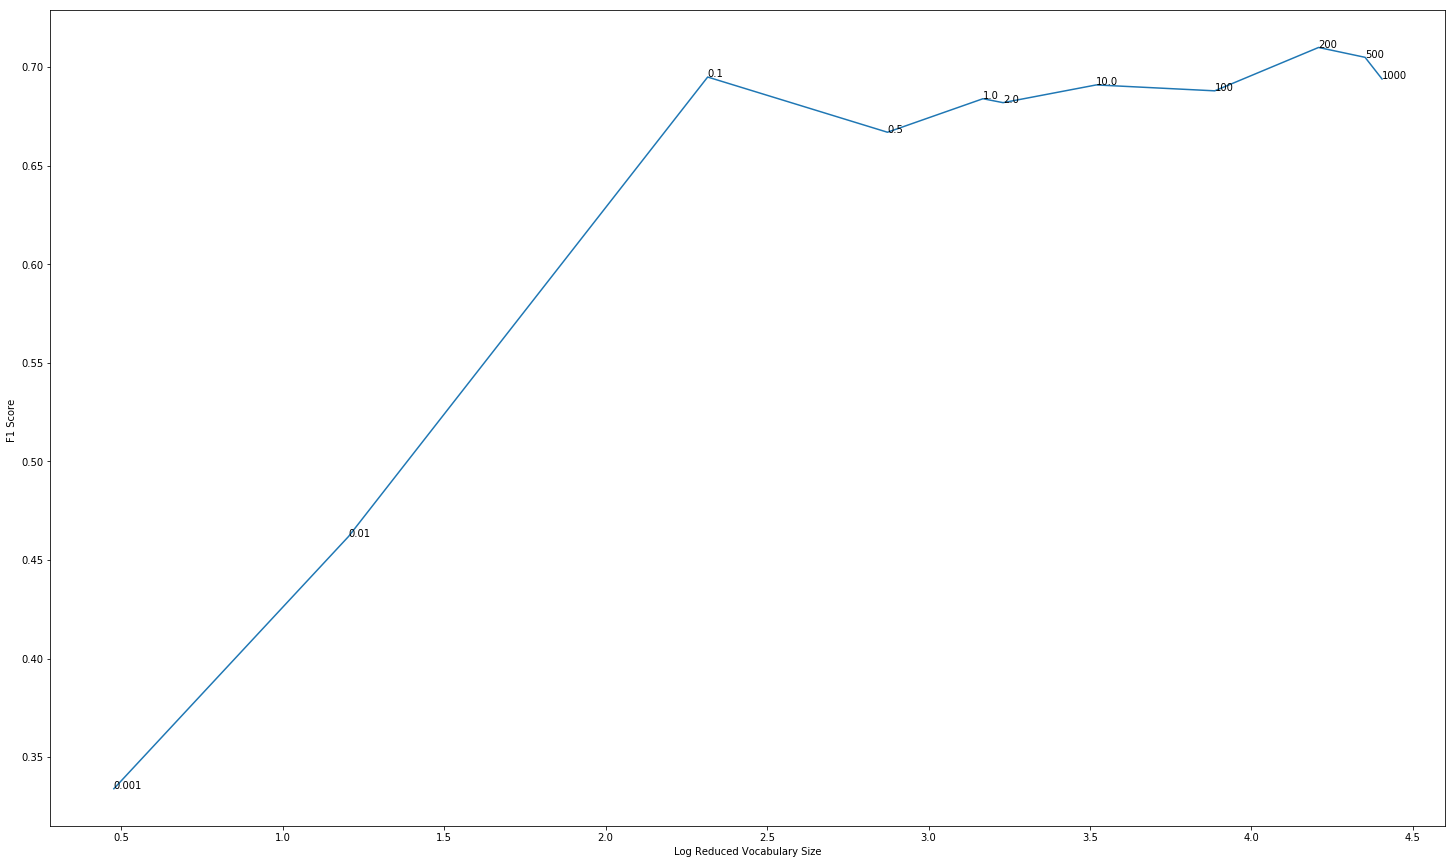

In [69]:
plt.rc('figure', figsize=[25,15])

reduced_vocab_redim = np.array(reduced_vocab)[:, np.newaxis]
log_reduced_vocab = np.log10(reduced_vocab_redim)
line_chart1 = plt.plot(log_reduced_vocab, f1scores)
plt.xlabel('Log Reduced Vocabulary Size')
plt.ylabel('F1 Score ')

index = 2 #c = 1e-10, 0.0001 don't have valid reduced vocabulary
for xy in zip(log_reduced_vocab , f1scores):                                        
    plt.annotate(c[index], xy=xy, textcoords='data') 
    index = index + 1

plt.show()


ANSWER:

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [ ]:
#def P7():
    ### STUDENT START ###
import pandas as pd
tfidVectorizer = TfidfVectorizer()
tfid_termdoc_train =  vectorizer.fit_transform(train_data)

clf = LogisticRegression(penalty='l2', dual=False, tol=0.015,multi_class="auto", C=100, solver='liblinear').fit(tfid_termdoc_train, train_labels)
predicted = clf.predict(term_doc_dev)
predicted_prob = clf.predict_proba(term_doc_dev)

df = pd.DataFrame(predicted_prob)


df['Max_Prob'] = df.max(axis=1)
df['Pred_Label'] = dev_labels
df['R_Ratio'] = 0
df['Doc'] = dev_data

df.columns = ['Prob_0','Prob_1','Prob_2','Prob_3','Max_Prob','Pred_Label','R_Ratio', 'Doc']



for item in range(len(predicted_prob)):
    max = (np.sort(predicted_prob[item])[::-1][:1])[0]
    r_ratio = float("{0:.3f}".format(max/predicted_prob[item][dev_labels[item]])) 
    df.iat[item,6] = r_ratio
    
df.sort_values(by='R_Ratio', ascending=False, inplace = True)

print('Table with 4 probabilities, maximum probability, prediction, r ratio and dev data')
print(df)

f1 =  metrics.f1_score(dev_labels, predicted, average="weighted" )
print('L1 Regression f1 score for C = 100 is', float("{0:.3f}".format(f1)))

print('\n\t\t\t\t------------------Doc 1 Begins---------------------\n')
print(dev_data[465])
print('\n\t\t\t\t------------------Doc 1 Ends ---------------------\n')
print('\n\nDoc 1 Label: ', newsgroups_train.target_names[dev_labels[465]], ', Doc 1 Prediction: ', newsgroups_train.target_names[predicted[465]])
print('\n\n\n\n\t\t\t\t------------------Doc 2 Begins---------------------\n')
print(dev_data[215])
print('\n\n\n\n\t\t\t\t------------------Doc 2 Ends---------------------\n')
print('\n\nDoc 2 Label: ', newsgroups_train.target_names[dev_labels[215]], ', Doc 2 Prediction: ', newsgroups_train.target_names[predicted[215]])
print('\n\n\n\n\t\t\t\t------------------Doc 3 Begins---------------------\n')
print(dev_data[275])
print('\n\n\n\n\t\t\t\t------------------Doc 3 Ends---------------------\n')
print('\n\nDoc 3 Label: ', newsgroups_train.target_names[dev_labels[275]], ', Doc 3 Prediction: ', newsgroups_train.target_names[predicted[275]])


    ### STUDENT END ###

#P7()

ANSWER: While CountVectorizer computes the term frequency (TF) of word appearences, TfidfVectorizer will compute the frequency (TF) as well as the Inverse Document Frequency (IDF) and then the TF-IDF scores (TF * IDF) in order to weigh word frequencies by their IDF values. The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less  informative than features that occur in a small fraction of the training corpus.
    
F1 Scores using CountVectorizer and TF-IDF Vectorizers are not too dissimilar, around 0.69. However, the way CountVectorizer creates the feature vectors is different from that of the TF-IDF vectorizer.


R-ratio intuitively describes the magnitude of a false prediction. A perfect R-ratio of 1.0 means that the model is highly certain and is actually correct in its prediction. A very high R-ratio greater than 1 means that the model is very highly certain of an incorrect prediction.

### What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.


One possible mistake is that despite the presence of label words in the input itself, the prediction is different from the category. Example is the presence of the label 'alt.atheism' in Doc 1 input text. The model predicts space instead. Why could that be the case? Perhaps, there are other features for space, planet, UFO etc., that are pulling the model to predict space instead of alt.atheism.


Another mistake can be seen in Doc 3. It is clear to the reader of doc 3 that the text is related to graphics. There is no case of a religious angle to it. The model however predicts alt.atheism. Clearly, it is wrong. One guess is that stop words are causing this issue. We will explore this particular issue in Part 8.


### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.

In [ ]:
#Remove Stop Words to see if it makes any difference


import pandas as pd
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS 
print('Stop Words:\n')
print(stop_words)

tfidVectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)
tfid_termdoc_train =  vectorizer.fit_transform(train_data)

clf = LogisticRegression(penalty='l2', dual=False, tol=0.015,multi_class="auto", C=100, solver='liblinear').fit(tfid_termdoc_train, train_labels)
predicted = clf.predict(term_doc_dev)
predicted_prob = clf.predict_proba(term_doc_dev)

df = pd.DataFrame(predicted_prob)


df['Max_Prob'] = df.max(axis=1)
df['Pred_Label'] = dev_labels
df['R_Ratio'] = 0
df['Doc'] = dev_data

df.columns = ['Prob_0','Prob_1','Prob_2','Prob_3','Max_Prob','Pred_Label','R_Ratio', 'Doc']



for item in range(len(predicted_prob)):
    max = (np.sort(predicted_prob[item])[::-1][:1])[0]
    r_ratio = float("{0:.3f}".format(max/predicted_prob[item][dev_labels[item]])) 
    df.iat[item,6] = r_ratio
    
df.sort_values(by='R_Ratio', ascending=False, inplace = True)

print(df)

f1 =  metrics.f1_score(dev_labels, predicted, average="weighted" )
print('L1 Regression f1 score for C = 100 is', float("{0:.3f}".format(f1)))

print('\n\t\t\t\t------------------Doc 1 Begins---------------------\n')
print(dev_data[465])
print('\n\t\t\t\t------------------Doc 1 Ends ---------------------\n')
print('\n\nDoc 1 Label: ', newsgroups_train.target_names[dev_labels[465]], ', Doc 1 Prediction: ', newsgroups_train.target_names[predicted[465]])
print('\n\n\n\n\t\t\t\t------------------Doc 2 Begins---------------------\n')
print(dev_data[215])
print('\n\n\n\n\t\t\t\t------------------Doc 2 Ends---------------------\n')
print('\n\nDoc 2 Label: ', newsgroups_train.target_names[dev_labels[215]], ', Doc 2 Prediction: ', newsgroups_train.target_names[predicted[215]])
print('\n\n\n\n\t\t\t\t------------------Doc 3 Begins---------------------\n')
print(dev_data[275])
print('\n\n\n\n\t\t\t\t------------------Doc 3 Ends---------------------\n')
print('\n\nDoc 3 Label: ', newsgroups_train.target_names[dev_labels[275]], ', Doc 3 Prediction: ', newsgroups_train.target_names[predicted[275]])


It looks like removing stop words did not make much of a difference at all. Next step in the continuous effort to implement a better model could be enhancing some heuristics such as giving heavier weights to topic related weights (such as religion, christianity, islam etc getting heavier weights) while carefully balancing overfitting with variance of the model. 